<a href="https://www.kaggle.com/code/jovanchua/financial-statement-analysis?scriptVersionId=141758610" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/financial-sentiment-analysis/data.csv


# Importing libraries and the dataset

## Importing libraries

In [2]:
import os
import gc
import shutil
from pathlib import Path
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Importing dataset

In [3]:
df = pd.read_csv('/kaggle/input/financial-sentiment-analysis/data.csv')
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


# Exploring the data

## Quick information on dataset

In [4]:
# No null entries, that make things easier
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


## Visualisations

In [5]:
# Target label breakdown by percentage seems a bit concerning, neutral is the majority class by far
fig = px.pie(df, names = 'Sentiment', color = 'Sentiment')
fig.update_layout(title = 'Pie Chart for Sentiment Distribution')

In [6]:
# When we break down by raw numbers however, it appears to be okay
label_count = df.Sentiment.value_counts()
fig = px.bar(df, x = label_count.index, y = label_count.values, color = label_count.index)
fig.update_layout(title = 'Count plot for Sentiment distribution',
                 xaxis_title = 'Sentiment',
                 yaxis_title = 'Count')

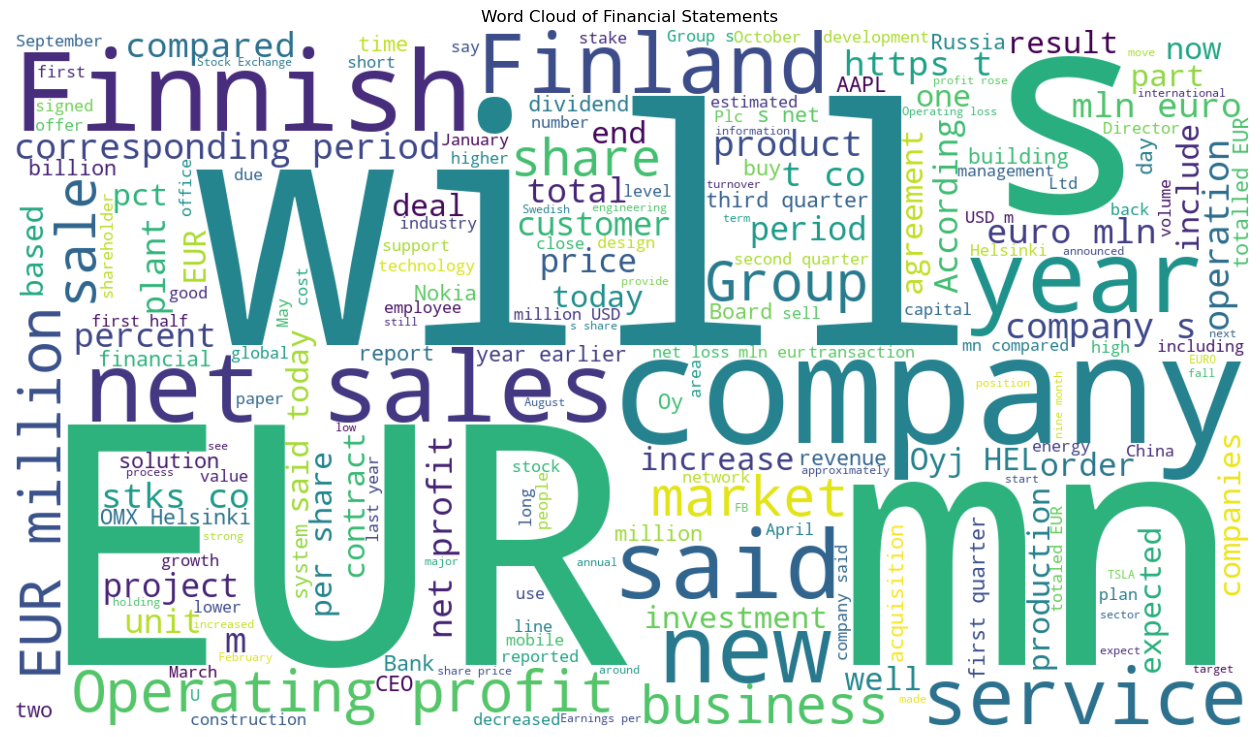

In [7]:
# Most commonly used words in the dataset
from wordcloud import WordCloud

text = ' '.join(df['Sentence'])
wordcloud = WordCloud(width=1280, height=720, background_color='white').generate(text)

plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Financial Statements')
plt.show()

## Encoding labels

In [8]:
# sentiment_unique = sorted(df.Sentiment.unique())
# sentiment_mp = {sentiment: i for i, sentiment in enumerate(sentiment_unique)}
# sentiment_mp

In [9]:
# df['Sentiment'] = df['Sentiment'].map(sentiment_mp)
# df.head()

In [10]:
# import random
# rand_idx = random.randint(0, df.shape[0] - 1)
# rand_text = df.Sentence.iloc[rand_idx]
# print(f'Text before decoding:\n{rand_text}\n')
# print(f"Text after decoding:\n{rand_text.encode('utf-8', 'ignore').decode()}")

# Preparing the data for modelling

In [11]:
# import nltk

# nltk.download('wordnet')
# !unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
# !pip install language-tool-python

# from collections import Counter
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.tokenize import TreebankWordTokenizer
# from nltk.stem import WordNetLemmatizer
# import string
# import re
# import language_tool_python

# def preprocess_text(text, tokenizer, lemmatizer, stop_words, spellchecker):
#     x = text.lower() # convert to lowercase
#     x = x.encode('utf-8', 'ignore').decode() # remove/ replace emojis and other special characters
#     x = ''.join([word for word in x if word not in string.punctuation]) # remove punctuations
#     x = tool.correct(x) # convert to correct spelling with context

#     stop_words = set(stopwords.words('english')) # retrieve stopwords

#     x = tokenizer.tokenize(x) # tokenizing
#     x = [token for token in x if not token in stop_words] # remove stopwords from tokens
#     x = [lemmatizer.lemmatize(token) for token in x] # lemmatize tokens, lemmatizing works by using vocabulary analysis to bring words to their base dictionary form, more costly than stemming, which is a heuristic approach
#     return x

# tokenizer = TreebankWordTokenizer()
# lemmatizer = WordNetLemmatizer()
# stop_words = set(stopwords.words('english'))
# tool = language_tool_python.LanguageTool('en-US')

In [12]:
# %%time
# df['clean_text'] = df['Sentence'].apply(lambda x: preprocess_text(x, tokenizer, lemmatizer, stop_words, tool))
# df['cleaned_text_joined'] = df['clean_text'].apply(lambda x: ' '.join(x))

## Generating metafeatures

Can add more if there is a need.

In [13]:
# def generate_metafeatures(df):
#     df['len_of_chars'] = df['cleaned_text_joined'].apply(lambda x: len(x))
#     df['len_of_words'] = df['clean_text'].apply(lambda x: len(x))
#     df['len_avg_word'] = df['cleaned_text_joined'].apply(lambda x: np.mean([len(w) for w in x.split()]))
#     return df

# full_df = generate_metafeatures(df)
# full_df.head()

# Modelling

**METRICS**

`Accuracy`: Simply put, is the percentage of predictions the model got correct, both for positive and negative classes.    
`Precision`: Proportion of postive predictions that are actually correct. Critical in situations where False Positives (FP) are more costly than False Negatives (FN). TP / (TP + FP)  
`Recall`: Proportion of actual positive classes that were identified correctly. Critical in situations missing a True Positive (TP) is more important than getting a FP. TP / (TP + FN)  
`F1`: The balanced trade-off between precision and recall, it basically is 2 x (PREC x REC) / (PREC + REC)  
`ROC-AUC`: The area under the curve, plots TPR against FPR for different thresholds. Useful when evaluating a model's performance across all possible classification thresholds. Robust to class imbalance as well.

## Naive approach

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold

# text = df['cleaned_text_joined'].values
# label = df.Sentiment.values

# metafeatures = ['len_of_chars', 'len_of_words', 'len_avg_word']

# class naiveApproach:
#     def __init__(self, classifiers, vectorizers, X, y):
#         self.classifiers = classifiers
#         self.vectorizers = vectorizers
#         self.X = X
#         self.y = y
        
#         self.results = {}
        
#     def prepare_data(self, vectorizer):
#         X_post = vectorizer.fit_transform(self.X)
#         X_tr, X_val, y_tr, y_val = train_test_split(X_post, self.y, random_state = 42, shuffle = True)
#         return X_tr, X_val, y_tr, y_val
    
#     def fit(self):
#         for clf in self.classifiers:
#             for vec in self.vectorizers:
#                 X_tr, X_val, y_tr, y_val = self.prepare_data(vec)
#                 clf.fit(X_tr, y_tr)
#                 y_pred = clf.predict(X_val)
#                 y_pred_prob = clf.predict_proba(X_val)
                
#                 key = type(clf).__name__ + ' ' + type(vec).__name__
#                 self.results[key] = {'accuracy': accuracy_score(y_val, y_pred),
#                                 'precision': precision_score(y_val, y_pred, average = 'weighted'),
#                                 'recall': recall_score(y_val, y_pred, average = 'weighted'),
#                                 'f1': f1_score(y_val, y_pred, average = 'weighted'),
#                                 'roc_auc': roc_auc_score(y_val, y_pred_prob, multi_class = 'ovr')}
        

# classifiers = [LogisticRegression(multi_class = 'multinomial'), MultinomialNB()]
# vectorizers = [CountVectorizer(ngram_range = (1, 3)), TfidfVectorizer(ngram_range = (1, 3))]
# first_run = naiveApproach(classifiers, vectorizers, text, label)

In [15]:
# %%time

# first_run.fit()

In [16]:
# pd.DataFrame(first_run.results).T.sort_values(by = ['roc_auc'], ascending = False)

## Naive approach with metafeatures

In [17]:
# from sklearn.preprocessing import MinMaxScaler

# class naiveApproachPlus(naiveApproach):
#     def __init__(self, classifiers, vectorizers, df, metafeatures, scaler):
#         X = df['cleaned_text_joined'].values
#         y = df['Sentiment'].values
#         super().__init__(classifiers, vectorizers, X, y)
#         self.df = df
#         self.metafeatures = metafeatures
#         self.scaler = scaler
#         self.prepare_data()
    
#     def prepare_data(self):
#         X = self.df[self.metafeatures + ['cleaned_text_joined']]
#         y = self.df['Sentiment']
#         self.X_tr, self.X_val, self.y_tr, self.y_val = train_test_split(X, y, random_state = 42, shuffle = True)
    
#     def prepare_pipeline(self, vec):
#         text_pipeline = make_pipeline(
#             vec
#         )
        
#         meta_pipeline = make_pipeline(
#             self.scaler
#         )
        
#         preprocessor = make_column_transformer(
#             (text_pipeline, 'cleaned_text_joined'),
#             (meta_pipeline, self.metafeatures)
#         )
        
#         return preprocessor
    
#     def fit(self):
#         for clf in self.classifiers:
#             for vec in self.vectorizers:
#                 column_pipe = self.prepare_pipeline(vec)
#                 main_pipe = make_pipeline(
#                     column_pipe,
#                     clf
#                 )
#                 main_pipe.fit(self.X_tr, self.y_tr)
#                 y_pred = main_pipe.predict(self.X_val)
#                 y_pred_prob = main_pipe.predict_proba(self.X_val)
                
#                 key = type(clf).__name__ + ' ' + type(vec).__name__
#                 self.results[key] = {'accuracy': accuracy_score(self.y_val, y_pred),
#                                 'precision': precision_score(self.y_val, y_pred, average = 'weighted'),
#                                 'recall': recall_score(self.y_val, y_pred, average = 'weighted'),
#                                 'f1': f1_score(self.y_val, y_pred, average = 'weighted'),
#                                 'roc_auc': roc_auc_score(self.y_val, y_pred_prob, multi_class = 'ovr')}

In [18]:
# scaler = MinMaxScaler()
# second_run = naiveApproachPlus(classifiers, vectorizers, full_df, metafeatures, scaler)

In [19]:
# %%time
# second_run.fit()

In [20]:
# # Adding metafeatures did help with improving our metrics
# pd.DataFrame(second_run.results).T.sort_values(by = ['roc_auc'], ascending = False)

In [21]:
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier

# classifiers = [LogisticRegression(multi_class = 'multinomial'), MultinomialNB(), SVC(decision_function_shape = 'ovr', probability = True), DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier(objective = 'multi:softmax', num_class = 3)]

In [22]:
# %%time
# third_run = naiveApproachPlus(classifiers, vectorizers, full_df, metafeatures, scaler)
# third_run.fit()

In [23]:
# # We take the top 3 best performing models

# pipelines = [(CountVectorizer(ngram_range = (1,3)), XGBClassifier(objective = 'multi:softmax', num_class = 3)), (TfidfVectorizer(ngram_range = (1, 2)), LogisticRegression(multi_class = 'multinomial')), (TfidfVectorizer(ngram_range = (1,3)), SVC(C = 0.8, probability = True, decision_function_shape = 'ovr'))]

In [24]:
# from sklearn.preprocessing import MinMaxScaler

# class top3Performing(naiveApproachPlus):
#     def __init__(self, df, pipelines, metafeatures, scaler):
#         self.df = df
#         self.pipelines = pipelines
#         self.pipelines_to_run = []
#         self.metafeatures = metafeatures
#         self.scaler = scaler
#         self.results = {}
#         self.prepare_data()
#         self.prepare_pipeline()
    
#     def prepare_data(self):
#         X = self.df[self.metafeatures + ['cleaned_text_joined']]
#         y = self.df['Sentiment']
#         self.X_tr, self.X_val, self.y_tr, self.y_val = train_test_split(X, y, random_state = 42, shuffle = True)
    
#     def prepare_pipeline(self):
#         for pipeline in self.pipelines:
#             text_pipeline = make_pipeline(
#                 pipeline[0]
#             )

#             meta_pipeline = make_pipeline(
#                 self.scaler
#             )

#             preprocessor = make_column_transformer(
#                 (text_pipeline, 'cleaned_text_joined'),
#                 (meta_pipeline, self.metafeatures)
#             )
            
#             self.pipelines_to_run.append(make_pipeline(
#                 preprocessor,
#                 pipeline[1]
#             ))
            
#     def fit(self):
#         for i, pipeline in enumerate(self.pipelines_to_run):
#             main_pipe = pipeline
#             main_pipe.fit(self.X_tr, self.y_tr)
#             y_pred = main_pipe.predict(self.X_val)
#             y_pred_prob = main_pipe.predict_proba(self.X_val)

#             key = i
#             self.results[key] = {'accuracy': accuracy_score(self.y_val, y_pred),
#                             'precision': precision_score(self.y_val, y_pred, average = 'weighted'),
#                             'recall': recall_score(self.y_val, y_pred, average = 'weighted'),
#                             'f1': f1_score(self.y_val, y_pred, average = 'weighted'),
#                             'roc_auc': roc_auc_score(self.y_val, y_pred_prob, multi_class = 'ovr')}

In [25]:
# %%time
# fourth_run = top3Performing(full_df, pipelines, metafeatures, scaler)
# fourth_run.fit()

In [26]:
# pd.DataFrame(fourth_run.results).rename(columns = {0: 'XGBClassifier CountVectorizer', 1: 'LogisticRegression TfidfVectorizer', 2: 'SVC TfidfVectorizer'}).T

# Hyperparameter tuning (not running in this notebook however, it's optional)

In [27]:
# import optuna

# # Example of using optuna to tune XGBClassifier in this case, but we won't be doing it this time round.
# def objective(trial):
#     # Defining the hyperparameter search space
#     params = {
#         'objective': 'multi:softmax', # As previously defined in our previous runs
#         'num_class': 3,
#         'lambda': trial.suggest_uniform('lambda', 1e-4, 2e-1),
#         'alpha': trial.suggest_uniform('alpha', 1e-4, 2e-1),
#         'learning_rate': trial.suggest_uniform('learning_rate', 1e-5, 1e-3),
#         'n_estimators': trial.suggest_int('n_estimators', 50, 300)
#     }
    
#     model = XGBClassifier(**params)
#     model.fit(X_tr, y_tr)
#     y_pred_prob = model.predict_proba(X_te)
#     roc_auc = roc_auc_score(y_te, y_pred_prob)
#     return roc_auc

# study = optuna.create_study(direction = 'maximize')
# study.optimize(objective, n_trials = 100)
# study.best_trial.params, study.best_value

# Tensorflow (for manual implementation)

In [28]:
# import tensorflow as tf
# from tensorflow.keras import layers
# from tensorflow.keras.layers import TextVectorization

# texts = full_df['cleaned_text_joined']
# sent_lens = [len(sentence.split()) for sentence in texts]
# output_seq_len = int(np.percentile(sent_lens, 95))
# output_seq_len

In [29]:
# vocab = set(word for document in texts for word in document.split())
# len(vocab)

In [30]:
# max_tokens = 11700
# vectorizer = TextVectorization(max_tokens = max_tokens, output_sequence_length = output_seq_len)
# vectorizer.adapt(texts.values)

In [31]:
# # Testing our vectorizer
# import random

# target_sentence = random.choice(texts)
# print(f'Target sentence: {target_sentence}')
# print(f'Length of text: {len(target_sentence.split())}')
# print(f'Vectorized text: {vectorizer([target_sentence])}')

In [32]:
# text_vocab = vectorizer.get_vocabulary()
# print(f'Number of words in vocab: {len(text_vocab)}')
# print(f'Most common words in vocabulary: {text_vocab[:5]}')
# print(f'Least common words in the vocabulary: {text_vocab[-5:]}')

In [33]:
# vectorizer.get_config()

In [34]:
# embeddings = layers.Embedding(input_dim = len(text_vocab),
#                              output_dim = 512,
#                              mask_zero = True,
#                              name = 'embeddings')

# print(f"Sentence before vectorization:\n{target_sentence}\n")
# vectorized_sentence = vectorizer([target_sentence])
# print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
# embedded_sentence = embeddings(vectorized_sentence)
# print(f"Sentence after embedding:\n{embedded_sentence}\n")
# print(f"Embedded sentence shape: {embedded_sentence.shape}")

In [35]:
# X_tr, X_te, y_tr, y_te = train_test_split(full_df['cleaned_text_joined'].values, full_df['Sentiment'].values, test_size = 0.2, random_state = 42)
# train_ds = tf.data.Dataset.from_tensor_slices((X_tr, y_tr))
# test_ds = tf.data.Dataset.from_tensor_slices((X_te, y_te))

# train_ds = train_ds.batch(32).prefetch(tf.data.AUTOTUNE)
# test_ds = test_ds.batch(32).prefetch(tf.data.AUTOTUNE)

In [36]:
# train_ds

In [37]:
# inputs = layers.Input(shape = (1,), dtype = tf.string)
# text_vectors = vectorizer(inputs)
# token_embeddings = embeddings(text_vectors)
# x = layers.Conv1D(64, kernel_size = 5, padding = 'same', activation = 'relu')(token_embeddings)
# x = layers.BatchNormalization()(x)
# x = layers.Dropout(0.3)(x)
# x = layers.Conv1D(64 ,  kernel_size = 5, padding = 'same', activation = 'relu')(x)
# x = layers.BatchNormalization()(x)
# x = layers.Dropout(0.3)(x)
# x = layers.Conv1D(64 ,  kernel_size = 5, padding = 'same', activation = 'relu')(x)
# x = layers.BatchNormalization()(x)
# x = layers.Dropout(0.3)(x)
# x = layers.GlobalMaxPooling1D()(x)
# outputs = layers.Dense(3, activation = 'softmax')(x)
# model = tf.keras.Model(inputs, outputs)

# model.compile(loss = 'sparse_categorical_crossentropy',
#              optimizer = tf.keras.optimizers.Adam(),
#              metrics = ['accuracy'])

In [38]:
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# early_stop = EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, min_lr = 1e-6)

# history = model.fit(train_ds,
#                    epochs = 100,
#                    validation_data = test_ds,
#                    callbacks = [early_stop, reduce_lr])

In [39]:
# inputs = layers.Input(shape = (1,), dtype = tf.string)
# text_vectors = vectorizer(inputs)
# token_embeddings = embeddings(text_vectors)

# x = layers.Bidirectional(layers.LSTM(64, return_sequences = True))(token_embeddings)
# x = layers.Dropout(0.3)(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences = True))(x)
# x = layers.Dropout(0.3)(x)
# x = layers.BatchNormalization()(x)
# x = layers.GlobalMaxPooling1D()(x)

# outputs = layers.Dense(3, activation = 'softmax')(x)
# model = tf.keras.Model(inputs, outputs)

# model.compile(loss = 'sparse_categorical_crossentropy',
#              optimizer = tf.keras.optimizers.Adam(),
#              metrics = ['accuracy'])

In [40]:
# history = model.fit(train_ds,
#                    epochs = 100,
#                    validation_data = test_ds,
#                    callbacks = [early_stop, reduce_lr])

# PyTorch/ Transformers

In [41]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torch.nn.functional as F

import transformers
from accelerate import Accelerator
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments

In [42]:
df.rename(columns = {'Sentence': 'text', 'Sentiment': 'labels'}, inplace = True)
df.head()

,text,labels
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [43]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [44]:
id2label = {idx: label for idx, label in enumerate(df['labels'].unique())}
id2label

{0: 'positive', 1: 'negative', 2: 'neutral'}

In [45]:
label2id = {label: idx for idx, label in enumerate(df['labels'].unique())}
label2id

{'positive': 0, 'negative': 1, 'neutral': 2}

In [46]:
class_weights = (1 - (df['labels'].value_counts())/len(df)).values
class_weights = torch.from_numpy(class_weights).float().to(device)
class_weights

tensor([0.4642, 0.6830, 0.8528], device='cuda:0')

In [47]:
model_name = 'microsoft/Multilingual-MiniLM-L12-H384'
tokenizer = AutoTokenizer.from_pretrained(model_name)

accelerator = Accelerator()
device = accelerator.device

In [48]:
class customTextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(text, padding = 'max_length', truncation = True, max_length = 32, return_tensors = 'pt')
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': label2id[label]
        }

In [49]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(df['text'].values, df['labels'].values, test_size = 0.2, random_state = 42)
X_tr, y_tr

tokenizer(X_tr[1], padding = 'max_length', max_length = 32, truncation = True)

{'input_ids': [0, 110, 56381, 1363, 100, 6863, 7123, 6, 4, 131216, 707, 113068, 7, 6, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [50]:
train_ds = customTextDataset(X_tr, y_tr, tokenizer)
test_ds = customTextDataset(X_te, y_te, tokenizer)

In [51]:
class WeightedLossTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs = False):
        outputs = model(**inputs)
        logits = outputs.get('logits')
        labels = inputs.get('labels')
        loss_func = nn.CrossEntropyLoss(weight = class_weights)
        loss = loss_func(logits, labels)
        return (loss, outputs) if return_outputs else loss

In [52]:
from sklearn.metrics import f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average = 'weighted')
    return {"f1": f1}

In [53]:
model = AutoModelForSequenceClassification.from_pretrained(model_name,
                                                          num_labels = 3,
                                                          id2label = id2label,
                                                          label2id = label2id).to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/Multilingual-MiniLM-L12-H384 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [54]:
from transformers import EarlyStoppingCallback

batch_size = 32
logging_steps = len(X_tr)//batch_size
output_dir = '/kaggle/working/hf'


train_args = TrainingArguments(
    output_dir = output_dir,
    num_train_epochs = 15,
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    logging_steps = logging_steps,
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    weight_decay = 1e-2,
    fp16 = True,
    load_best_model_at_end = True,
    save_total_limit = 1
)

trainer = WeightedLossTrainer(
    model = model,
    args = train_args,
    compute_metrics = compute_metrics,
    train_dataset = train_ds,
    eval_dataset = test_ds
)

In [55]:
trainer.train()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3508 in run_code        │
│                                                                                                  │
│   3505 │   │   │   │   if async_:                                                                │
│   3506 │   │   │   │   │   await eval(code_obj, self.user_global_ns, self.user_ns)               │
│   3507 │   │   │   │   else:                                                                     │
│ ❱ 3508 │   │   │   │   │   exec(code_obj, self.user_global_ns, self.user_ns)                     │
│   3509 │   │   │   finally:                                                                      │
│   3510 │   │   │   │   # Reset our crash handler in place                                        │
│   3511 │   │   │   │   sys.excepthook = old_excepthook                                           │
│                                                                                                  │
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 trainer.train()                                                                              │
│   2                                                                                              │
│                                                                                                  │
│ /opt/conda/lib/python3.10/site-packages/transformers/trainer.py:1645 in train                    │
│                                                                                                  │
│   1642 │   │   inner_training_loop = find_executable_batch_size(                                 │
│   1643 │   │   │   self._inner_training_loop, self._train_batch_size, args.auto_find_batch_size  │
│   1644 │   │   )                                                                                 │
│ ❱ 1645 │   │   return inner_training_loop(                                                       │
│   1646 │   │   │   args=args,                                                                    │
│   1647 │   │   │   resume_from_checkpoint=resume_from_checkpoint,                                │
│   1648 │   │   │   trial=trial,                                                                  │
│                                                                                                  │
│ /opt/conda/lib/python3.10/site-packages/transformers/trainer.py:1862 in _inner_training_loop     │
│                                                                                                  │
│   1859 │   │   self._globalstep_last_logged = self.state.global_step                             │
│   1860 │   │   model.zero_grad()                                                                 │
│   1861 │   │                                                                                     │
│ ❱ 1862 │   │   self.control = self.callback_handler.on_train_begin(args, self.state, self.contr  │
│   1863 │   │                                                                                     │
│   1864 │   │   # Skip the first epochs_trained epochs to get the random state of the dataloader  │
│   1865 │   │   if not args.ignore_data_skip:                                                     │
│                                                                                                  │
│ /opt/conda/lib/python3.10/site-packages/transformers/trainer_callback.py:353 in on_train_begin   │
│                                                                                                  │
│   350 │                                                                                          │
│   351 │   def on_train_begin(self, args: TrainingArguments,

In [ ]:
# from transformers import AutoModel

# best_checkpoint = '/kaggle/working/hf/checkpoint-888'
# model = AutoModel.from_pretrained(best_checkpoint)

In [ ]:
# model